In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# 1. Data

In [40]:
(train_img,train_labels), (test_img,test_labels) = mnist.load_data()

In [41]:
x = test_img
y = test_labels

In [42]:
x.shape

(10000, 28, 28)

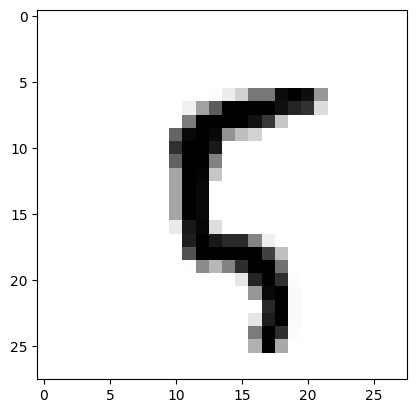

Số này là: 1


In [43]:
digit = train_img[100]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print('Số này là:', train_labels[200])

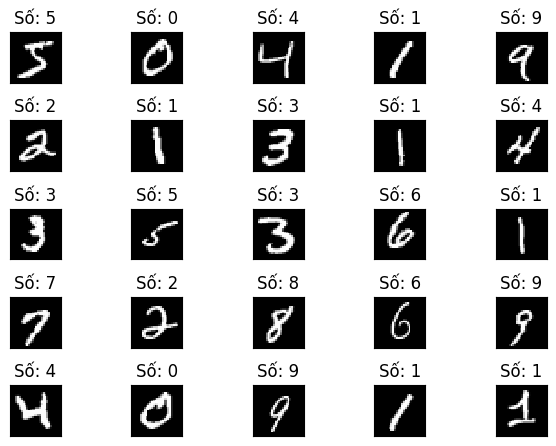

In [44]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_img[i],cmap = 'gray', interpolation = 'none')
  plt.title('Số: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [45]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (784,)))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [46]:
train_imgs = train_img.reshape(60000,28*28)
train_img = train_imgs.astype('float32')/255

test_imgs = test_img.reshape(10000,28*28)
test_imgs = test_imgs.astype('float32')/255

In [47]:
from keras.utils import to_categorical
train_labels= to_categorical(train_labels,10) #one hot encoding
test_labels = to_categorical(test_labels,10)

In [48]:
test_labels.shape

(10000, 10)

In [49]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_imgs,train_labels,epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('Mất mát: ', test_loss)
print("Độ chính xác: ", test_acc)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 5.9534 - accuracy: 0.8984
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6737 - accuracy: 0.9532
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4504 - accuracy: 0.9653
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3584 - accuracy: 0.9722
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3032 - accuracy: 0.9763
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2634 - accuracy: 0.9801
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2466 - accuracy: 0.9822
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2184 - accuracy: 0.9845
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2245 - accuracy: 0.9842
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7085 - accuracy: 0.8863

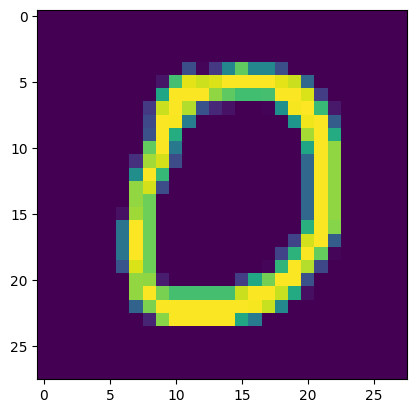

Số hiển thị là:  0


In [58]:
img_test = x[10]
plt.imshow(img_test)
plt.show()
print("Số hiển thị là: ",y[10])

In [60]:
x_pred = x[10].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255
np.argmax(model.predict(x_pred),axis = -1)

1/1 [==============================] - 0s 163ms/step


array([0])

# Cifar10

In [127]:
import keras
(train_img,train_labels), (test_img,test_labels) = keras.datasets.cifar10.load_data()

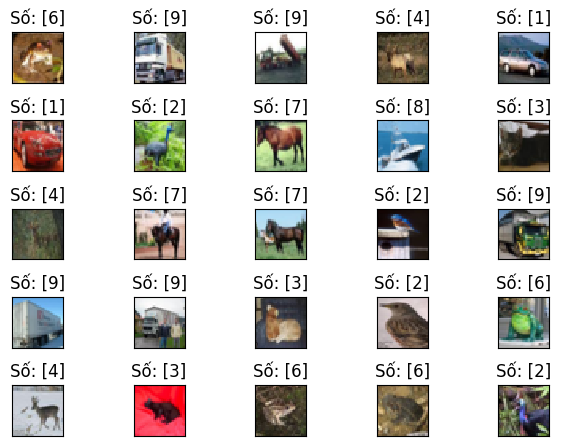

In [128]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_img[i],cmap = 'gray', interpolation = 'none')
  plt.title('Số: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [129]:
x_test.shape

(10000, 32, 32, 3)

In [130]:
train_imgs = train_img.reshape(50000,32*32*3)
train_imgs = train_imgs.astype('float32')/255

test_imgs = test_img.reshape(10000,32*32*3)
test_imgs = test_imgs.astype('float32')/255

In [131]:
from keras.utils import to_categorical
train_labels= to_categorical(y_train,10) #one hot encoding
test_labels = to_categorical(y_test,10)

In [132]:
train_labels.shape

(50000, 10)

In [124]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (32*32*3,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               1573376   
                                                                 
 dense_33 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_imgs,train_labels,epochs = 10, batch_size = 3000)
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('Mất mát: ', test_loss)
print("Độ chính xác: ", test_acc)

Epoch 1/10
17/17 [==============================] - 1s 28ms/step - loss: 1.8551 - accuracy: 0.3548
Epoch 2/10
17/17 [==============================] - 0s 28ms/step - loss: 1.7500 - accuracy: 0.3803
Epoch 3/10
17/17 [==============================] - 1s 40ms/step - loss: 1.7420 - accuracy: 0.3868
Epoch 4/10
17/17 [==============================] - 1s 42ms/step - loss: 1.7421 - accuracy: 0.3823
Epoch 5/10
17/17 [==============================] - 1s 40ms/step - loss: 1.7362 - accuracy: 0.3867
Epoch 6/10
17/17 [==============================] - 1s 41ms/step - loss: 1.7243 - accuracy: 0.3932
Epoch 7/10
17/17 [==============================] - 1s 38ms/step - loss: 1.7168 - accuracy: 0.3937
Epoch 8/10
17/17 [==============================] - 1s 41ms/step - loss: 1.7109 - accuracy: 0.3969
Epoch 9/10
17/17 [==============================] - 0s 28ms/step - loss: 1.6967 - accuracy: 0.4009
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6718 - accuracy: 0.4022
Mất mát:

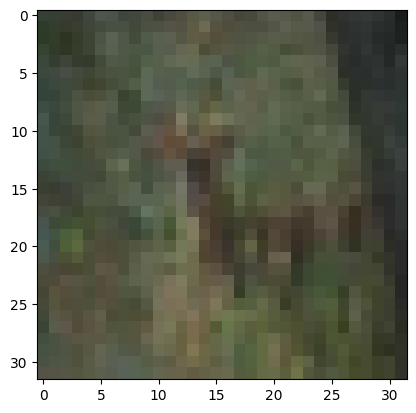

Số hiển thị là:  0


In [139]:
img_test = train_img[10]
plt.imshow(img_test)
plt.show()
print("Số hiển thị là: ",y[10])

In [111]:
from keras.models import load_model
model.save('/content/drive/MyDrive/AI/test1.h5')
model5 = load_model('/content/drive/MyDrive/AI/test1.h5')

In [ ]:
url = ''
img = plt.imread(url)
plt.imshow(img)
plt.show()

In [ ]:
from keras.utils import load_img, img_to_array
img = load_img(url,target_size=(32,32))
plt.imshow()
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis = -1)
# cfar100, fashion MNIST